Task 1: Simple Linear Regression 
● Use the scikit-learn library. 
● Load the California Housing Dataset (or any house price dataset). 
● Predict the house price using a single feature (e.g., number of rooms). 
● Train a simple linear regression model. 
● Plot the regression line using matplotlib.

Model Coefficient: 0.0768
Model Intercept: 1.6548
Mean Squared Error: 1.2923


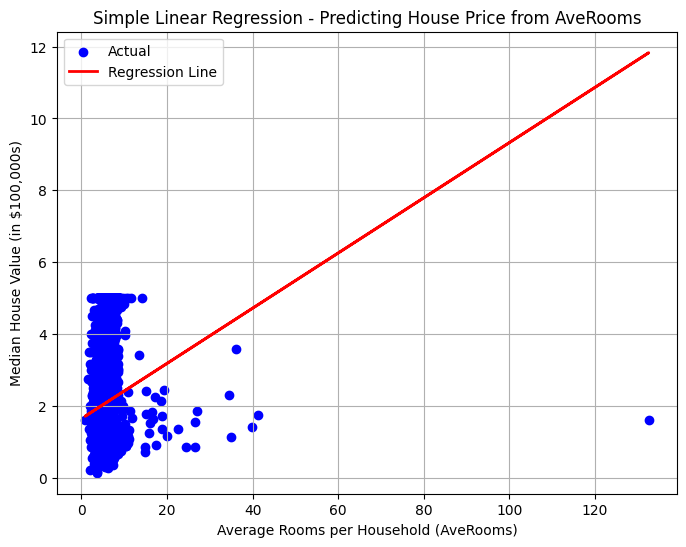

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names


room_index = feature_names.index("AveRooms")
X_rooms = X[:, room_index].reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"Model Coefficient: {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Average Rooms per Household (AveRooms)")
plt.ylabel("Median House Value (in $100,000s)")
plt.title("Simple Linear Regression - Predicting House Price from AveRooms")
plt.legend()
plt.grid(True)
plt.show()


Task 2: Multiple Linear Regression 
● Use the same dataset or load another dataset with at least 4 numeric 
features. 
● Predict the target variable using multiple independent variables. 
● Evaluate the model using: 
○ R-squared 
○ Mean Squared Error (MSE) 
○ Root Mean Squared Error (RMSE) 
● Display the coefficients of each feature. 

In [6]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


data = fetch_california_housing()
X = data.data  
y = data.target 
feature_names = data.feature_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("Model Evaluation:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

print("Feature Coefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")


Model Evaluation:
R-squared: 0.5758
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456

Feature Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337

Intercept: -37.0233


Task 3: Feature Scaling and Normalization 
● Demonstrate the effect of standardizing features using 
StandardScaler. 
● Compare model performance before and after scaling.

In [7]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

d = fetch_california_housing()
X, y = d.data, d.target

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42)

m1 = LinearRegression()
m1.fit(Xtr, ytr)
yp1 = m1.predict(Xts)

sc = StandardScaler()
Xtr_s = sc.fit_transform(Xtr)
Xts_s = sc.transform(Xts)

m2 = LinearRegression()
m2.fit(Xtr_s, ytr)
yp2 = m2.predict(Xts_s)

def eval(y, p):
    r2 = r2_score(y, p)
    mse = mean_squared_error(y, p)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

r2a, msea, rmsea = eval(yts, yp1)
r2b, mseb, rmseb = eval(yts, yp2)

print("No Scale:")
print(f"R2: {r2a:.4f}, MSE: {msea:.4f}, RMSE: {rmsea:.4f}")

print("\nWith Scale:")
print(f"R2: {r2b:.4f}, MSE: {mseb:.4f}, RMSE: {rmseb:.4f}")


No Scale:
R2: 0.5758, MSE: 0.5559, RMSE: 0.7456

With Scale:
R2: 0.5758, MSE: 0.5559, RMSE: 0.7456


Task 4: Model Interpretation 
● Write Python code to: 
○ Show the correlation matrix using a heatmap. 
○ Identify which features have the strongest relationship with 
the target. 
○ Discuss multicollinearity and how it might affect regression.

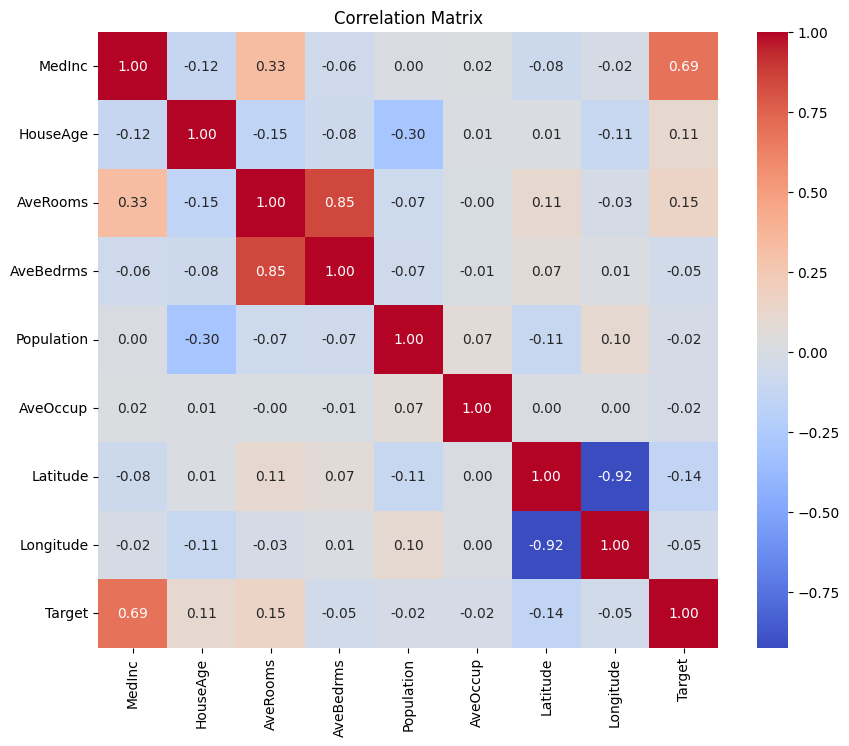


Top correlated with target:

MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

d = fetch_california_housing()
df = pd.DataFrame(d.data, columns=d.feature_names)
df['Target'] = d.target

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

top_corr = corr['Target'].drop('Target').sort_values(ascending=False)
print("\nTop correlated with target:\n")
print(top_corr)
